In [1]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
# load the dataset
amazon = pd.read_csv(r"C:\Users\visha\Downloads\20191226-reviews.csv")
amazon.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [3]:
# check for null values
amazon.isnull().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [4]:
# drop the null values 
amazon = amazon.dropna(how = 'any')
amazon.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [5]:
# check again for null values
amazon.isnull().sum()

asin            0
name            0
rating          0
date            0
verified        0
title           0
body            0
helpfulVotes    0
dtype: int64

In [6]:
# display the data type and the number of values in each column
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27206 entries, 0 to 67982
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          27206 non-null  object 
 1   name          27206 non-null  object 
 2   rating        27206 non-null  int64  
 3   date          27206 non-null  object 
 4   verified      27206 non-null  bool   
 5   title         27206 non-null  object 
 6   body          27206 non-null  object 
 7   helpfulVotes  27206 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [7]:
# check the dimensions of the dataset
amazon.shape

(27206, 8)

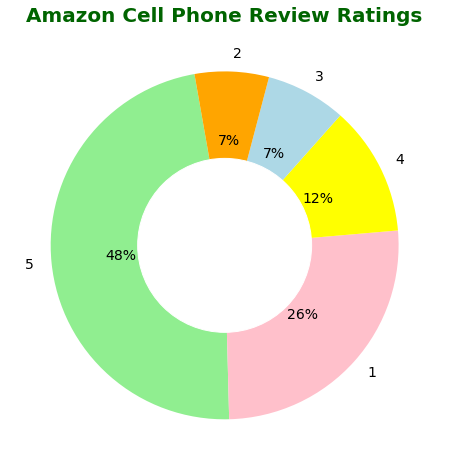

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a pie chart to see the percentage of highest rating and the lowest rating
rating = amazon["rating"].value_counts()
numbers = rating.index
quantity = rating.values
colors = ['lightgreen','pink','yellow','lightblue','orange']
plt.figure(figsize=(8,8))
plt.pie(quantity, labels = numbers, colors = colors,startangle = 100,autopct='%.0f%%')
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=14)
plt.title("Amazon Cell Phone Review Ratings", fontsize=20, fontweight = 'bold', color = 'Darkgreen')
plt.show()

In [9]:
# calculate the sentiment scores of the body column for further analysis
sentiments = SentimentIntensityAnalyzer()
amazon["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in amazon["body"]]
amazon["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in amazon["body"]]
amazon["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in amazon["body"]]
print(amazon.head())

         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  Positive  \
0  I had the Samsung A600 for awhile which is abs...           1.0     0.105   
1  Due to a software issue between Nokia and Spri...          17.0     0.104   
2  This is a great, reliable phone. I 

In [10]:
# check to see if the customer is willing to purchase a phone from amazon based on their review
x = sum(amazon["Positive"])
y = sum(amazon["Negative"])
z = sum(amazon["Neutral"])

def score(a,b,c):
    if (a>b) and (a <c):
        print("Positive")
    elif( b>a) and (b<c):
        print("Negative")
    else:
        print("Neutral")
score(x,y,z)

Positive


In [11]:
# print all of the scores with the positive, negative, and neutral reviews
print("Positive: ", x)
print("Negative: ",y)
print("Neutral: ", z)

Positive:  5022.301000000003
Negative:  1756.803999999994
Neutral:  20417.808000000085
